<h1><center> 
    Régression linéaire
</center></h1>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Régression linéaire simple
## 1.1. Création d'un jeu de données synthétique

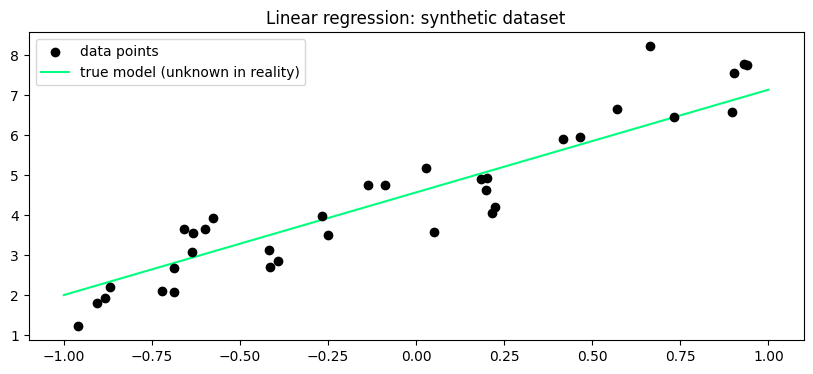

In [42]:
n = 35
np.random.seed(42)
x = np.random.uniform(-1,1,n)

a_true = +2.564496
b_true = +4.569355

def true_model(x):
    return a_true*x + b_true

y = true_model(x) + np.random.normal(0,0.7,n)


N = 300
xx = np.linspace(-1,1, N)

plt.figure(figsize=(10,4))
plt.scatter(x,y,label='data points',c='k');
plt.title("Linear regression: synthetic dataset")
plt.plot(xx,true_model(xx),c='springgreen',label='true model (unknown in reality)',zorder=-1)
plt.legend();

## 1.2. Résolution avec les moindres carrés

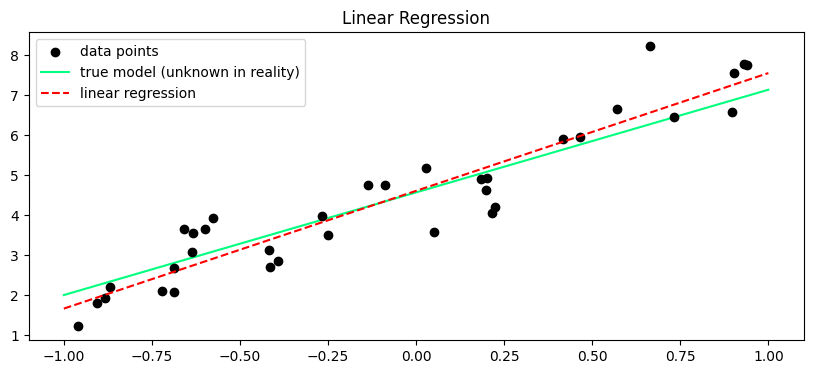

In [43]:
a_star = ((x*y).mean() - x.mean()*y.mean()) / ((x**2).mean() - x.mean()**2)
b_star = y.mean() - a_star *x.mean()


def model(x):
    return a_star * x + b_star


plt.figure(figsize=(10,4))
plt.scatter(x,y,label='data points',c='k');
plt.title("Linear Regression")
plt.plot(xx,true_model(xx),c='springgreen',label='true model (unknown in reality)',zorder=-1)
plt.plot(xx,model(xx),label='linear regression',linestyle='--',c='r');
plt.legend();

## 1.3. Sensibilité aux outliers (valeur aberrantes)

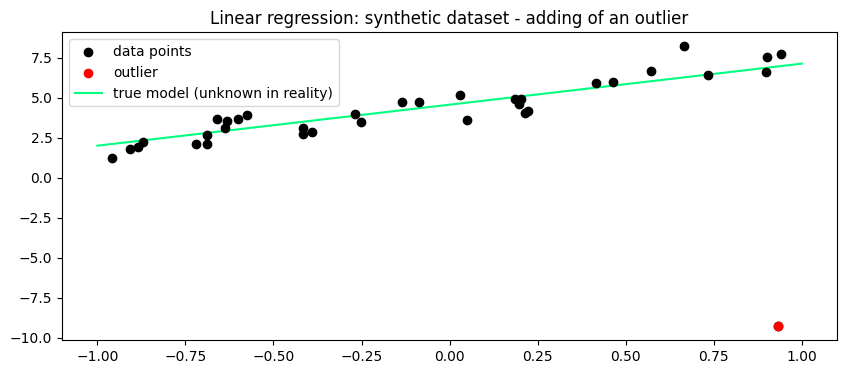

In [44]:
n = 35
np.random.seed(42)
x = np.random.uniform(-1,1,n)

a_true = +2.564496
b_true = +4.569355

def true_model(x):
    return a_true*x + b_true

y = true_model(x) + np.random.normal(0,0.7,n)
y[-1] += np.random.normal(0,19)


N = 300
xx = np.linspace(-1,1, N)

plt.figure(figsize=(10,4))
plt.scatter(x,y,label='data points',c='k');
plt.scatter(x[-1],y[-1],label='outlier',c='r');
plt.title("Linear regression: synthetic dataset - adding of an outlier")
plt.plot(xx,true_model(xx),c='springgreen',label='true model (unknown in reality)',zorder=-1)
plt.legend();

## 1.4. Comparaison cost function L1 vs L2

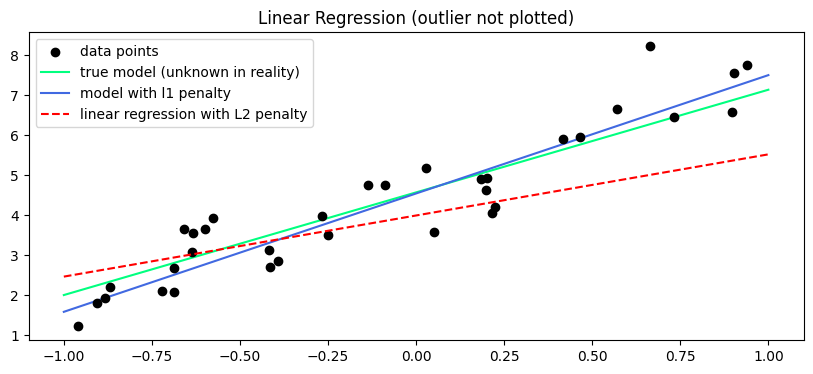

In [71]:
a_star = ((x*y).mean() - x.mean()*y.mean()) / ((x**2).mean() - x.mean()**2)
b_star = y.mean() - a_star *x.mean()


def model(x):
    return a_star * x + b_star

from scipy.optimize import minimize
import numpy as np

def fit(X, params):
    return params[0]*X + params[1]


def cost_function(params, X, y):
    return np.sum(np.abs(y - fit(X, params)))

params0 = np.array([0,0])
output = minimize(cost_function, params0, args=(x, y))

y_hat_l1 = fit(x, output.x)


plt.figure(figsize=(10,4))
plt.scatter(x[:-1],y[:-1],label='data points',c='k');
#plt.scatter(x[-1],y[-1],label='outlier',c='r');
plt.title("Linear Regression (outlier not plotted)")
plt.plot(xx,true_model(xx),c='springgreen',label='true model (unknown in reality)',zorder=-1)
plt.plot(xx,fit(xx, output.x),c='royalblue',label='model with l1 penalty',zorder=-1)
plt.plot(xx,model(xx),label='linear regression with L2 penalty',linestyle='--',c='r');
plt.legend();

> __La pénalisation L1 est moins sensible aux outliers__

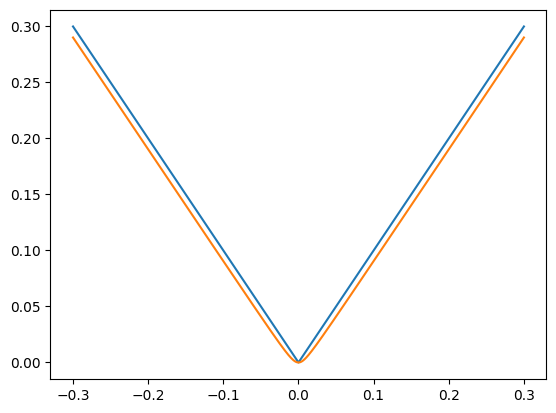

In [36]:
n = 10 **4
xx = np.linspace(-0.3, .3, n)

def pseudo_sqrt(x, epsilon=1e-2):
    return np.sqrt(x**2 + epsilon**2) - epsilon


plt.plot(xx, np.abs(xx))
plt.plot(xx, pseudo_sqrt(xx))

# 2. Polynomial Regression

Coder une classe `PolynomialRegression` avec : 
- son constructeur `__init__(self, q=2)` où `q` est le degré du polynôme interpolateur
- une méthode `fit(self,x,y)` qui calcule la régression polynômiale de degré `q` aux points `x`,`y`.
- la méthode `__call__(self, x)` qui permettra d'appeler l'instance une fois entraînée et retournera la prédiction du modèle pour le vecteur `x`.
- éventuellement : une méthode `SSE(self,x,y)` qui retournera la SSE du modèle (entraîné) aux points `x`,`y`.

In [11]:
class PolynomialRegression:
    """
    Classe de régression polynômiale.
    """
    def __init__(self, q=2):
        """
        q: degré du polynôme de régression, égal à 2 par défaut.
        """
        self.q = q
        self.fitted = False
        
    def fit(self, x, y):
        """
        Détermine les coefficients optimaux du polynôme de régression.
        """
        A = np.zeros((self.q+1,self.q+1))
        b = np.zeros(self.q+1)
        for i in range(self.q+1):
            for j in range(self.q+1):
                ...
                
            b[i]= ...
            
        self.coeffs = np.linalg.solve(A, b)
        
        self.fitted = True
        
    def SSE(self, x, y):
        """
        Calcule la Sum of the Squared Errors du polynôme de régression aux points (x,y)
        """
        return ((self(x) - y)**2).mean()
    
    def __call__(self, x):
        """
        Permet d'appeler le polynôme de régression.
        """
        if not self.fitted:
            raise Error("This model is not fitted.")
        out = np.sum([coef*x**i for (i,coef) in enumerate(self.coeffs)],axis=0)
        return out

## 2.1. Création d'un jeu de données synthétique

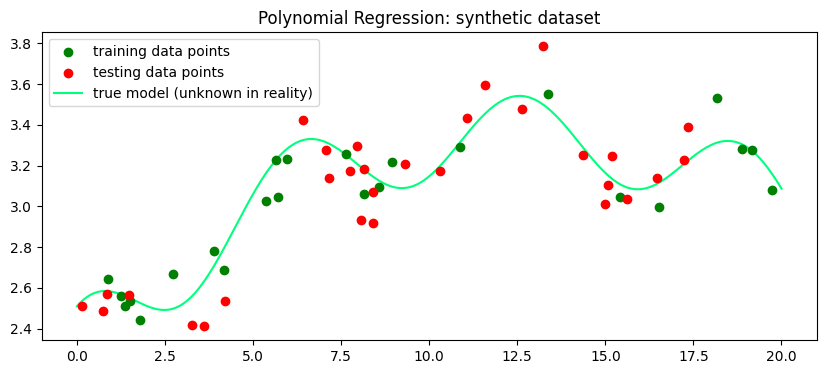

In [12]:
# génération d'un modèle à retrouver :
def true_model(x):
    return np.sqrt(x + 5 + 1.3*np.cos(x**1)- x**2/25)

N = 300
b = 20
xx = np.linspace(0, b, N)

np.random.seed(31)

# training dataset :
n_train = 24
x_train = np.random.uniform(0, b, n_train)
y_train = true_model(x_train) + np.random.normal(0,1/9, n_train)

# testing dataset :
n_test = 30
x_test = np.random.uniform(0, b, n_test)
y_test = true_model(x_test) + np.random.normal(0,1/9, n_test)

# régression polynomiale avec notre clase créée plus haut :
p = PolynomialRegression(q=6)
p.fit(x_train,y_train)

# graphiques :
plt.figure(figsize=(10,4))
plt.title("Polynomial Regression: synthetic dataset")
plt.scatter(x_train,y_train,label='training data points',c='g');
plt.scatter(x_test,y_test,label='testing data points',c='r');
plt.plot(xx,true_model(xx),c='springgreen',label='true model (unknown in reality)',zorder=-1)
# plt.plot(xx,p(xx),label='polyomial regression',linestyle='--',c='r');
plt.legend();

## 2.2. Résolution

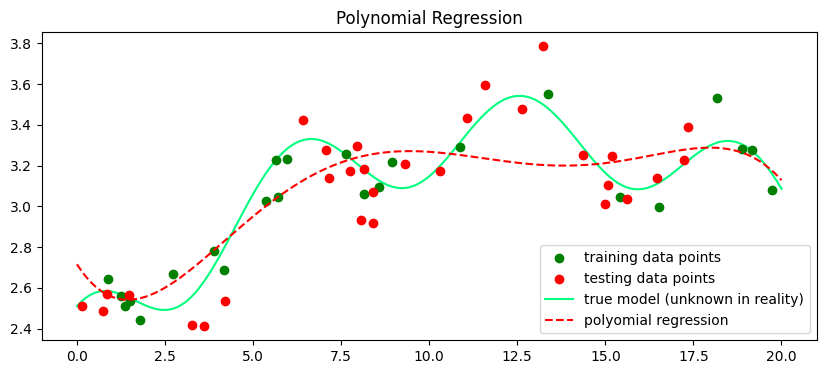

In [13]:
p = PolynomialRegression(q=5)
p.fit(x_train,y_train)

plt.figure(figsize=(10,4))
plt.title("Polynomial Regression")
plt.scatter(x_train,y_train,label='training data points',c='g');
plt.scatter(x_test,y_test,label='testing data points',c='r');
plt.plot(xx,true_model(xx),c='springgreen',label='true model (unknown in reality)',zorder=-1)
plt.plot(xx,p(xx),label='polyomial regression',linestyle='--',c='r');
plt.legend();

## 2.3. Underfitting vs Overfitting

En gardant les même jeux de données d'entraînement et de test que précédemment, calculer la SSE sur les deux jeux de données (SSE train et SSE test) pour différent niveaux de complexité du modèle (c-à-d plusieurs valeurs de $q$).

Plotter les `SSE_train` et `SSE_test` obtenues en fonction des différentes valeurs de `q`. Conclure.

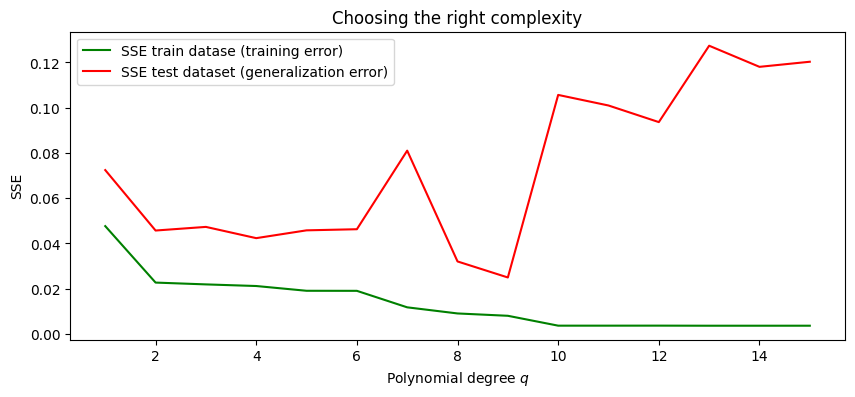

In [14]:
qs = list(range(1,16))
SSEs_train = []
SSEs_test = []
for q in qs:
    p = PolynomialRegression(q=q)
    p.fit(x_train, y_train)
    SSEs_train.append(p.SSE(x_train, y_train))
    SSEs_test.append(p.SSE(x_test, y_test))
    
    
plt.figure(figsize=(10,4))
plt.title("Choosing the right complexity")
plt.plot(qs,SSEs_train, label='SSE train datase (training error)',c='g');
plt.plot(qs,SSEs_test , label='SSE test dataset (generalization error)',c='r');
plt.legend();
plt.xlabel(r'Polynomial degree $q$'); plt.ylabel("SSE");

- en augmentant toujours plus la complexité du modèle, on fait tendre l'erreur d'entraînement vers zéro
- pour l'erreur de généralisation, un modèle trop simple (*sous-apprentissage* ou *underfitting*) ne semble pas optimal. Egalement, quand la complexité devient trop grande, le modèle explique très mal les nouvelles données, on dit qu'il y a *sur-apprentissage* (ou *overfit*) des données d'entraînement.
- le meilleur modèle est donc celui qui minimise l'erreur de généralisation. Ici, on serait tenté de dire $q=9$, mais cela semble chanceux dans cet exemple, mieux vaut prendre $q=5$ ou $6$, qui sera un modèle plus robuste.

<h1><center> 
<img src="../data/overfitting-and-underfitting.png" alt="drawing" width="650"/>
</center></h1>